<img src="https://global.utsa.edu/tec-partnership/images/logos/logotipo-horizontal-azul-transparente.png"  width="600">

## **Avance 1: Proyecto Integrador**
## Visualización interactiva de calidad de aire en AR en aplicaciones móviles con análisis y forecasting con AI y ML
### **TC5035 - Proyecto Integrador (Gpo 10)**
### **Equipo #56**
#### Tecnológico de Monterrey
---
*   NOMBRE: Paulina Escalante Campbell
*   MATRÍCULA: A01191962
---
### **Objetivo**

El proyecto se basa en la revitalización y rediseño de “Aire”, una aplicación móvil con el objetivo de informar y concientizar sobre la calidad del aire en Monterrey y otras ciudades mexicanas, mediante el uso de realidad aumentada (AR). Se buscan encontrar insights y hace run análisis de la calidad de aire en las ciudades más populares del mundo.

Para este avance del proyecto integrador se busca elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo y abordar y corregir los problemas identificados en los datos.

In [70]:
# Setup inicial del proyecto con GPU y google drive, conectar a runtime de T4GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

from google.colab import drive
drive.mount('/content/drive')

# Asegurarse que los datos han sido copiados a este directorio de google drive
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/ProyectoIntegrador"
os.chdir(DIR)

Mon Sep 29 03:33:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [71]:
# Imports para análisis de datos y visualizaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [72]:
# Importar los datos y entender las diferentes columas y valores
main_df = pd.read_csv('global_air_pollution_data.csv')
main_df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [73]:
# Notamos que co_aqi_value\t tiene un typo
main_df = main_df.rename(columns={'co_aqi_value\t': 'co_aqi_value'})

###**Análisis de valores**
Determinar cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utilizando el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas



In [74]:
# Columnas con sus valores y tipos
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value        23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [75]:
# Estadísticas de los valores de las columnas numéricas
main_df.describe()

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [76]:
# Descripción de valores no numéricos
main_df.describe(include = 'object').T

,count,unique,top,freq
country_name,23036,175,United States of America,2872
city_name,23462,23462,Marang,1
aqi_category,23463,6,Good,9936
co_aqi_category,23463,3,Good,23460
ozone_aqi_category,23463,5,Good,21069
no2_aqi_category,23463,2,Good,23448
pm2.5_aqi_category,23463,6,Good,10208



> Parece que Estados Unidos tiene los mayores valores pero la ciudad de Marang tiene los mayores valores por ciudad (Malasia). Por último, en general parece que la calidad de aire más frecuente es Buena.




In [77]:
# Analizamos los valores con más detalle, por ejemplo, India es el segundo país con más valores.
object_df = main_df.select_dtypes(include=['object'])
for (columnName, columnData) in object_df.items():
    print('*******************************')
    print('Column Name : ', columnName)
    print('Column unique value counts : \n', columnData.value_counts())
    print('*******************************\n')

*******************************
Column Name :  country_name
Column unique value counts : 
 country_name
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Bahrain                        1
Seychelles                     1
State of Palestine             1
Saint Kitts and Nevis          1
Monaco                         1
Name: count, Length: 175, dtype: int64
*******************************

*******************************
Column Name :  city_name
Column unique value counts : 
 city_name
Marang              1
Praskoveya          1
Presidente Dutra    1
Priolo Gargallo     1
Przasnysz           1
                   ..
Qinzhou             1
Qalyub              1
Pyatigorsk          1
Puurs               1
Puttlingen          1
Name: count, Length: 23462, dtype: int64
*******************************

*******************************
Column Name :  

In [78]:
# Analizamos los valores numéricos con más detalle ahora
numerical_df = main_df.select_dtypes(include=['int64', 'float64'])
for (columnName, columnData) in numerical_df.items():
    print('*******************************')
    print('Column Name : ', columnName)
    print('Column unique description : \n', columnData.describe())
    print('*******************************\n')

*******************************
Column Name :  aqi_value
Column unique description : 
 count    23463.000000
mean        72.010868
std         56.055220
min          6.000000
25%         39.000000
50%         55.000000
75%         79.000000
max        500.000000
Name: aqi_value, dtype: float64
*******************************

*******************************
Column Name :  co_aqi_value
Column unique description : 
 count    23463.000000
mean         1.368367
std          1.832064
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        133.000000
Name: co_aqi_value, dtype: float64
*******************************

*******************************
Column Name :  ozone_aqi_value
Column unique description : 
 count    23463.000000
mean        35.193709
std         28.098723
min          0.000000
25%         21.000000
50%         31.000000
75%         40.000000
max        235.000000
Name: ozone_aqi_value, dtype: float64
*******************************

In [79]:
# Información general del dataset
print("Dimensiones del dataset:", main_df.shape)
print("Número de países únicos:", main_df['country_name'].nunique())
print("Número de ciudades únicas:", main_df['city_name'].nunique())
print("Columnas disponibles:", main_df.columns.tolist())

Dimensiones del dataset: (23463, 12)
Número de países únicos: 175
Número de ciudades únicas: 23462
Columnas disponibles: ['country_name', 'city_name', 'aqi_value', 'aqi_category', 'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value', 'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category']


# **Análisis univariado de columnas**

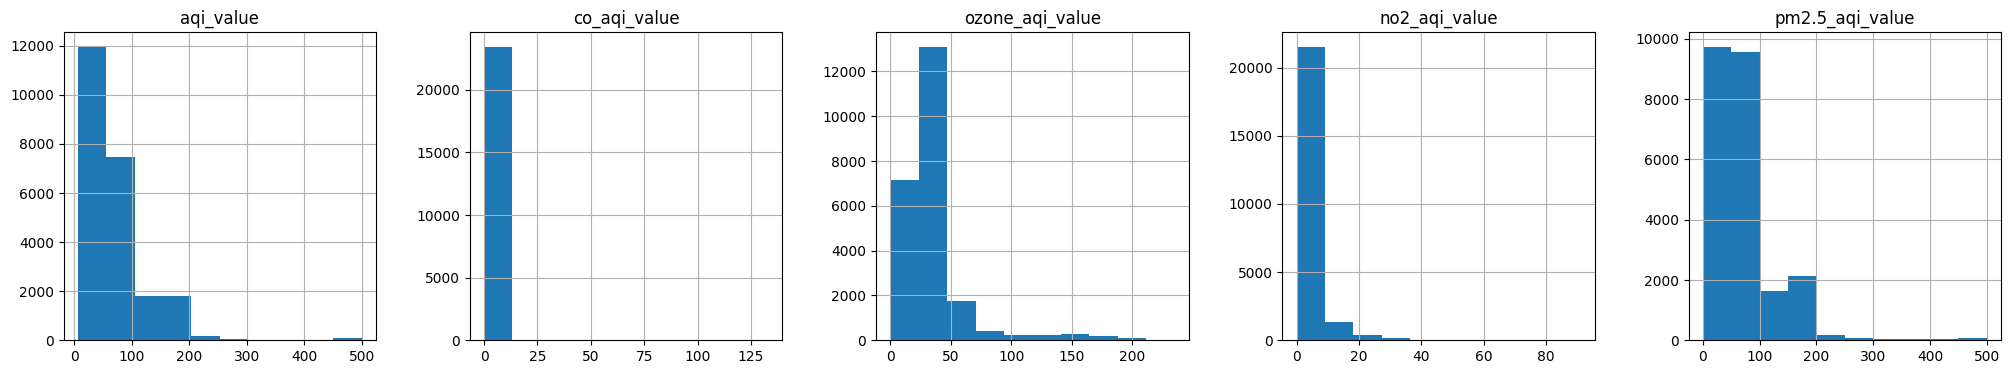

In [80]:
# Análisis univariado de variables numéricas simple
main_df.hist(figsize=(25,4), layout=(1,5))
plt.show()

In [81]:
# Analizamos los valores con más detalle, por example, India es el segundo país con más valores.
numerical_df = main_df.select_dtypes(include=['int64', 'float64'])

# Definir tamaño del grid de subplots
num_cols = len(numerical_df)
n_cols = 3  # número de columnas en el grid
n_rows = (num_cols + n_cols - 1) // n_cols  # cálculo de filas necesario

# Crear el grid de histogramas
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(numerical_df, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(main_df[col], bins=30, kde=True, color='seagreen')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle("Distribución de columnas numéricas del dataset", fontsize=16, y=1.02)
plt.show()

###**Observaciones**

| Variable           | Distribución observada                             | Observaciones clave                                                       | Conclusiones                                      |
|--------------------|----------------------------------------------------|---------------------------------------------------------------------------|-------------------------------------------------------|
| `aqi_value`        | Bimodal, leve sesgo izquierdo                      | Mezcla de ciudades con aire limpio y contaminado                          | Analizar por región o país; segmentar                |
| `co_aqi_value`     | Sesgo fuerte a la izquierda, concentrada en 0–2    | Monóxido de carbono generalmente bajo; pocos casos extremos               | Puede no ser muy predictiva; verificar relevancia    |
| `ozone_aqi_value`  | Amplia, moderadamente uniforme                     | O₃ varía entre ciudades; posible influencia estacional                    | Explorar series de tiempo                            |
| `no2_aqi_value`    | Muy sesgada a la izquierda                         | Dióxido de nitrógeno bajo en la mayoría; algunos puntos críticos          | Revisar outliers; considerar log-transformación      |
| `pm2.5_aqi_value`  | Extendida, con acumulación en 20–70                | Alta variabilidad; contaminante clave en salud urbana                     | Candidato ideal a variable objetivo (`target`)       |
| General            | Escalas distintas, sesgos y outliers               | Riesgo de efectos dominantes o ruido en algunos modelos                   | Normalizar / estandarizar; usar PCA si necesario     |

**Riesgo de outliers:** presente en ozone, no2, pm2.5

**Preprocesamiento necesario:**
*  Normalización o estandarización
*  Posible tratamiento de valores extremos
*  Revisión de balance de clases si se usa clasificación (aqi_category, etc.)



In [82]:
for column_name, column_data in numerical_df.items():
    print('*******************************')
    print(f'Column Name: {column_name}')
    print(f'Skew:  {column_data.skew():.2f}')
    print(f'Kurt:  {column_data.kurt():.2f}')
    print('*******************************\n')

*******************************
Column Name: aqi_value
Skew:  3.29
Kurt:  17.57
*******************************

*******************************
Column Name: co_aqi_value
Skew:  23.08
Kurt:  1289.35
*******************************

*******************************
Column Name: ozone_aqi_value
Skew:  3.10
Kurt:  12.12
*******************************

*******************************
Column Name: no2_aqi_value
Skew:  3.79
Kurt:  22.43
*******************************

*******************************
Column Name: pm2.5_aqi_value
Skew:  2.82
Kurt:  13.62
*******************************





> Algunos de estos números indican que hay variables sesgadas y con colas muy largas, skew es la asimetría y kurt es relevante a la distribución normal y las colas. Si el Skew es 0, significa que hay distribución simétrica. Si el kurt es 3 se considera una distribución normal o mesocúrtica. En este caso tenemos valores preocupantes en todas las variables y requieren limpieza.

<img src="https://www.investopedia.com/thmb/NKSVbpZ5lOEgY7wFyRcHfVA8PEE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-8bd7469732784d998c4059c2fd898489.jpg"  width="700">



| Variable            | Skew  | Kurtosis | Interpretación                                                                 |
|---------------------|-------|----------|--------------------------------------------------------------------------------|
| `aqi_value`         | 3.29  | 17.57     | Sesgo fuerte a la derecha; muchos valores bajos y algunos muy altos.          |
| `co_aqi_value`      | 23.08 | 1289.35   | Extremadamente sesgada; distribución casi truncada con pocos valores altos.   |
| `ozone_aqi_value`   | 3.10  | 12.12     | Sesgo alto a la derecha; presencia significativa de valores extremos.         |
| `no2_aqi_value`     | 3.79  | 22.43     | Alta asimetría y curtosis; valores atípicos frecuentes en el extremo superior.|
| `pm2.5_aqi_value`   | 2.82  | 13.62     | Muy sesgada; muchos valores bajos, pero con una cola larga hacia la derecha.  |




In [83]:
# Función para detectar outliers con cuartiles
def detectar_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

In [84]:
# Usar la función para encontrar outliers
for col in numerical_df:
    outliers, low, high = detectar_outliers_iqr(main_df, col)
    print(f"***** {col} *****")
    print(f" - Total outliers: {len(outliers)}")
    print(f" - Límites: [{low:.2f}, {high:.2f}]")
    print("--------------------------------------------------")

***** aqi_value *****
 - Total outliers: 2935
 - Límites: [-21.00, 139.00]
--------------------------------------------------
***** co_aqi_value *****
 - Total outliers: 8596
 - Límites: [1.00, 1.00]
--------------------------------------------------
***** ozone_aqi_value *****
 - Total outliers: 1513
 - Límites: [-7.50, 68.50]
--------------------------------------------------
***** no2_aqi_value *****
 - Total outliers: 1681
 - Límites: [-6.00, 10.00]
--------------------------------------------------
***** pm2.5_aqi_value *****
 - Total outliers: 2641
 - Límites: [-31.00, 145.00]
--------------------------------------------------


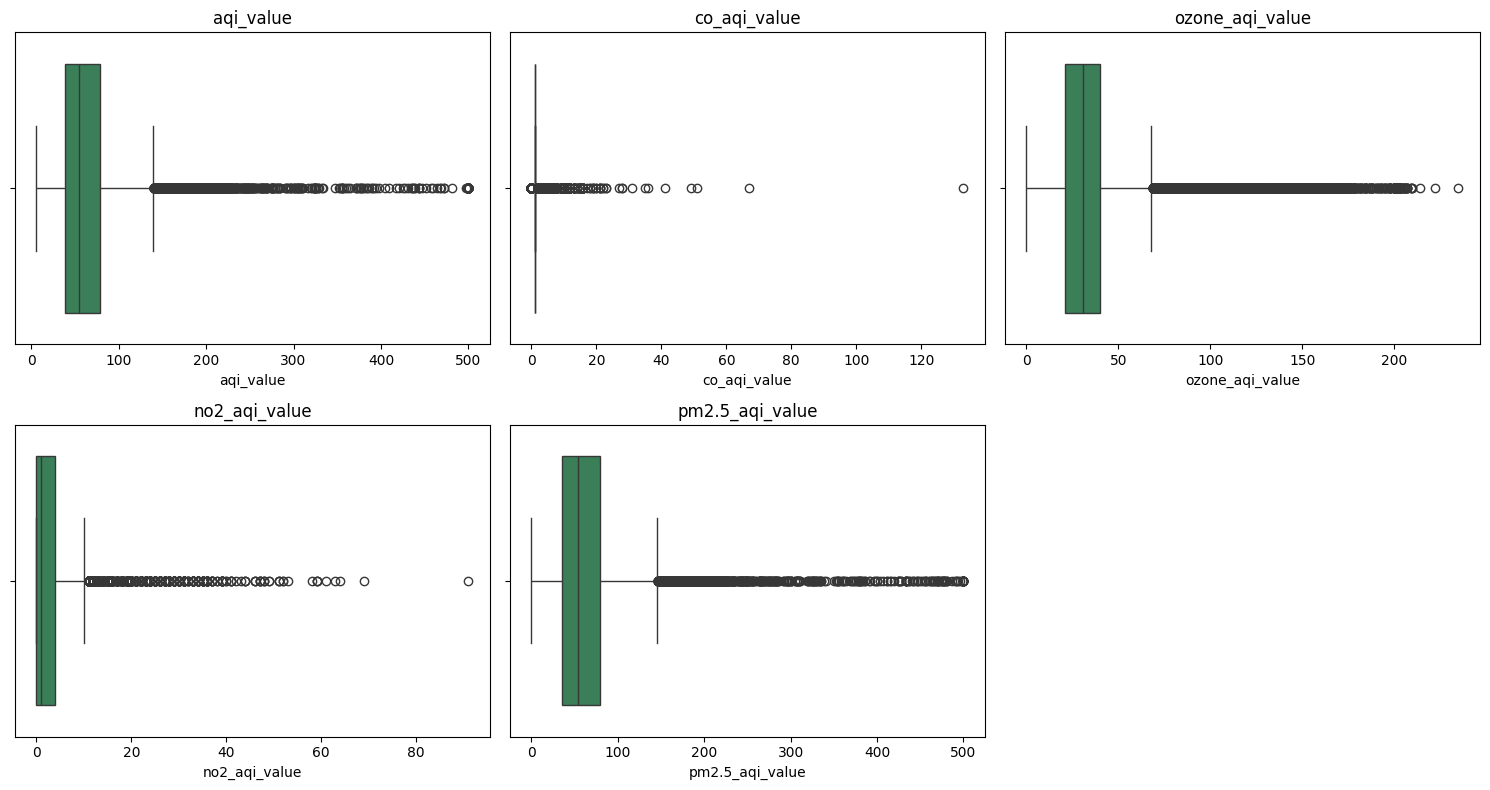

In [85]:
# Visualización de outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_df, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=main_df[col], color='seagreen')
    plt.title(col)
plt.tight_layout()
plt.show()

In [86]:
# Limpieza de valores nulos
print('La siguiente tabla muestra la cantidad de valores nulos que contiene cada columna.\n')
print(main_df.isna().sum())
# Aunque aquí hacemos un drop, podríamos usar un API para buscar que país pertenece la ciudad...
main_df_no_null = main_df.dropna()
print('\nLa siguiente tabla muestra que ya ninguna columna cuenta con valores nulos.\n')
print(main_df_no_null.isna().sum())
print('\nLa siguiente tabla muestra el df sin valores nulos y con los índices reiniciados.\n')
main_df_no_null.reset_index(drop=True, inplace=True)
main_df_no_null


La siguiente tabla muestra la cantidad de valores nulos que contiene cada columna.

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value            0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

La siguiente tabla muestra que ya ninguna columna cuenta con valores nulos.

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value          0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

La siguiente tabla muestra el df sin valores nulos y con los índices reiniciados.



,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23030,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23031,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23032,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23033,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [87]:
# Reemplazar el data frame a non-null
main_df = main_df_no_null

In [95]:
# Valores duplicados
print(f'Hay {main_df.duplicated().sum()} valores duplicados.')

Hay 0 valores duplicados.


# **Análisis bivariado de columnas**

<Axes: >

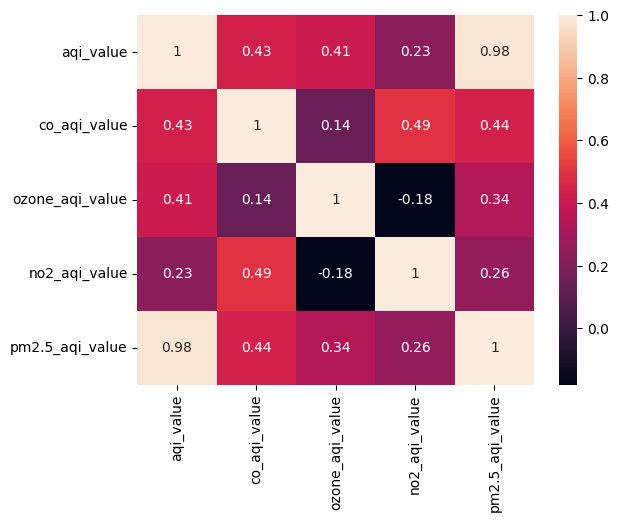

In [88]:
# Correlación de variables numéricas
numerical_df = main_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(round(numerical_df.corr(), 2), annot=True)



> Con estos resultados obtenemos una correlación alta entre PM2.5 y el AQI general. Esto indica que el índice de calidad del aire (aqi_value) está prácticamente determinado por los niveles de PM2.5.



<Axes: xlabel='no2_aqi_value', ylabel='aqi_value'>

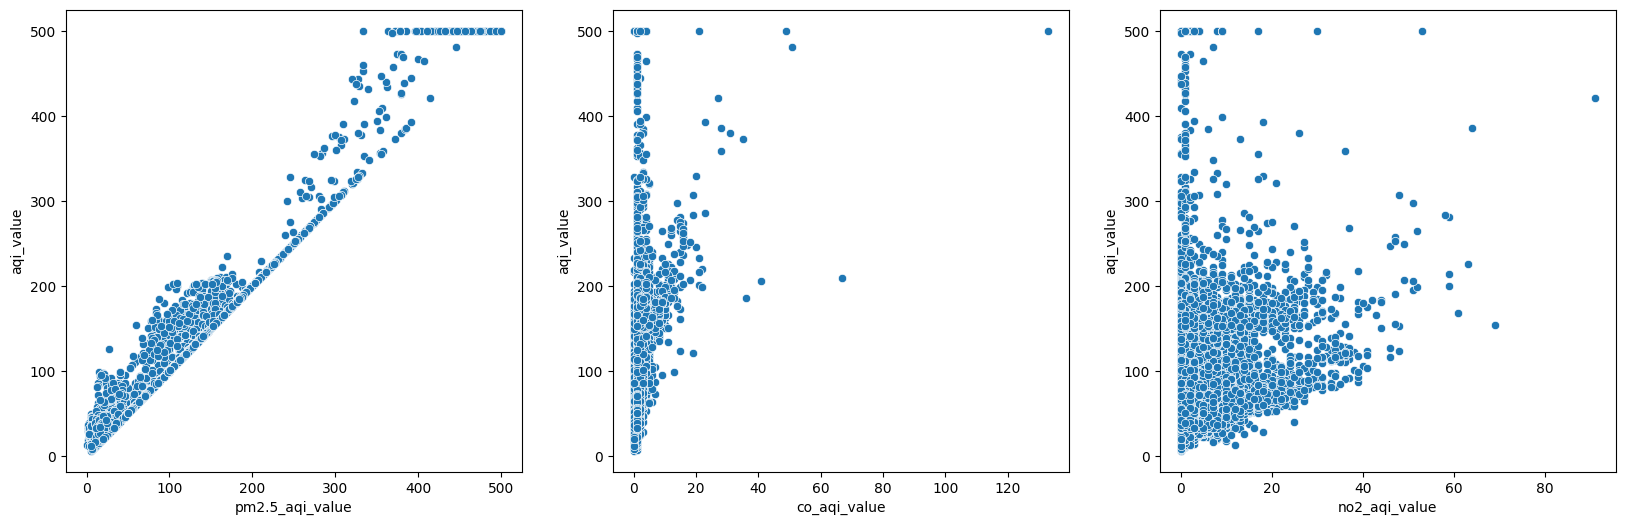

In [89]:
# Verificamos con diagramas de dispersión
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
sns.scatterplot(x='pm2.5_aqi_value', y='aqi_value', data=main_df, ax=axes[0])
sns.scatterplot(x='co_aqi_value', y='aqi_value', data=main_df, ax=axes[1])
sns.scatterplot(x='no2_aqi_value', y='aqi_value', data=main_df, ax=axes[2])


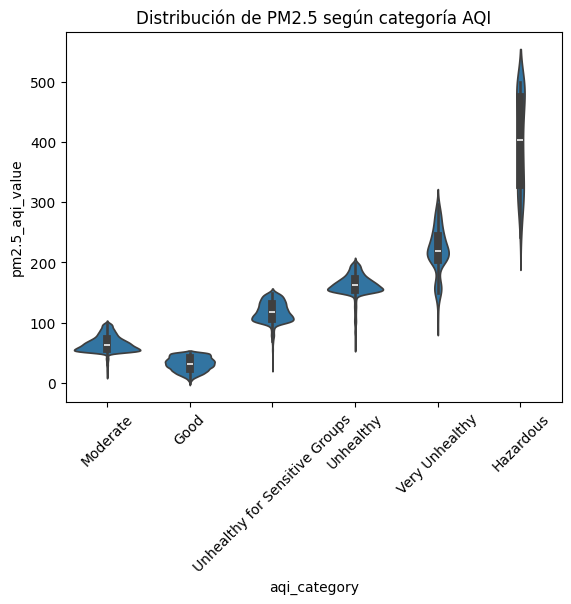

In [90]:
# Analizar el PM2.5 por categoría
sns.violinplot(x='aqi_category', y='pm2.5_aqi_value', data=main_df)
plt.title("Distribución de PM2.5 según categoría AQI")
plt.xticks(rotation=45)
plt.show()

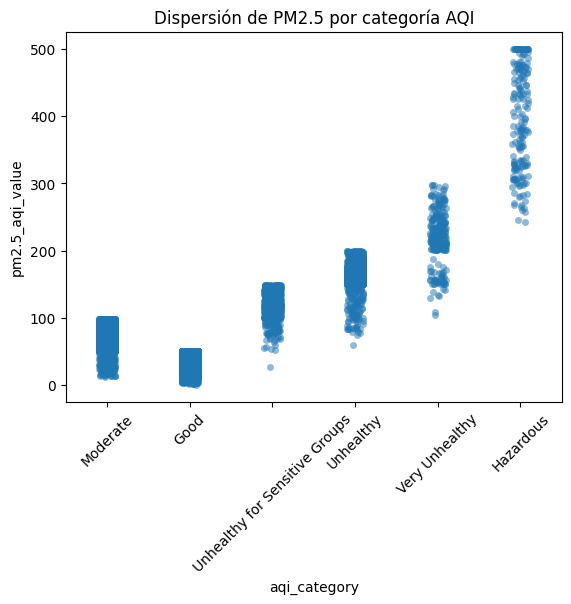

In [91]:
sns.stripplot(x='aqi_category', y='pm2.5_aqi_value', data=main_df, jitter=True, alpha=0.5)
plt.title("Dispersión de PM2.5 por categoría AQI")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1992513047.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




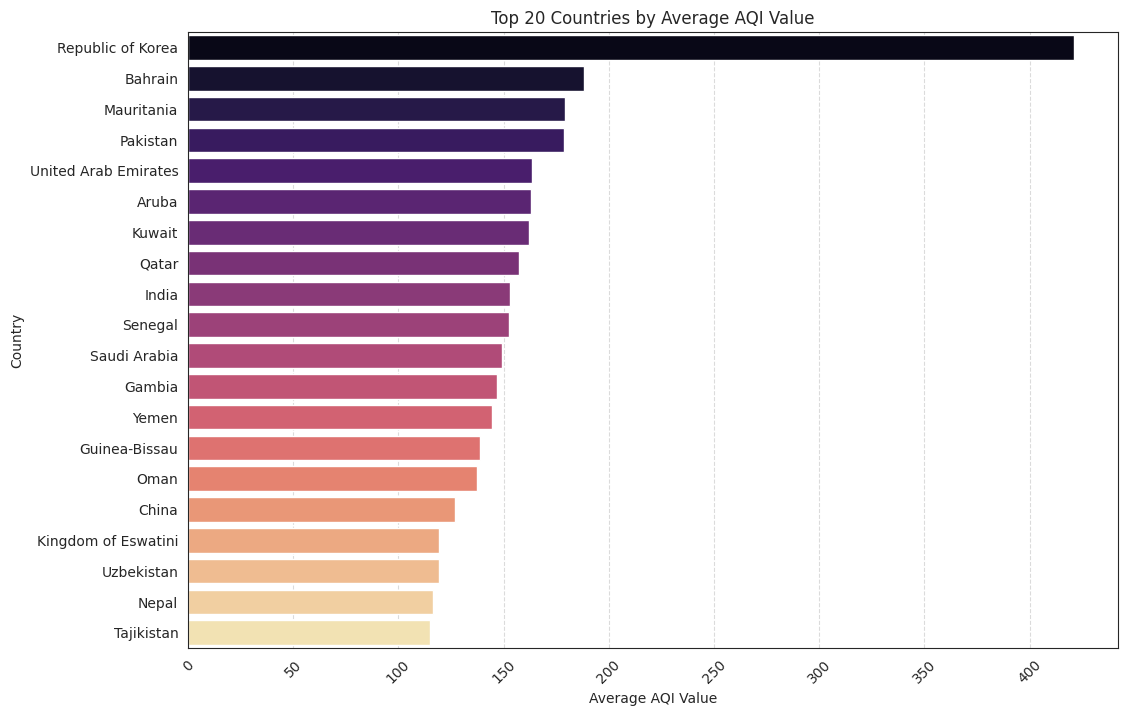

In [97]:
sns.set_style("white")

# Average AQI por pais
avg_aqi_by_country = main_df.groupby('country_name')['aqi_value'].mean().sort_values(ascending=False)

# Seleccionar top 20 países
top_20_countries = avg_aqi_by_country.head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_countries.values, y=top_20_countries.index, palette='magma')
plt.title('Top 20 Countries by Average AQI Value')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

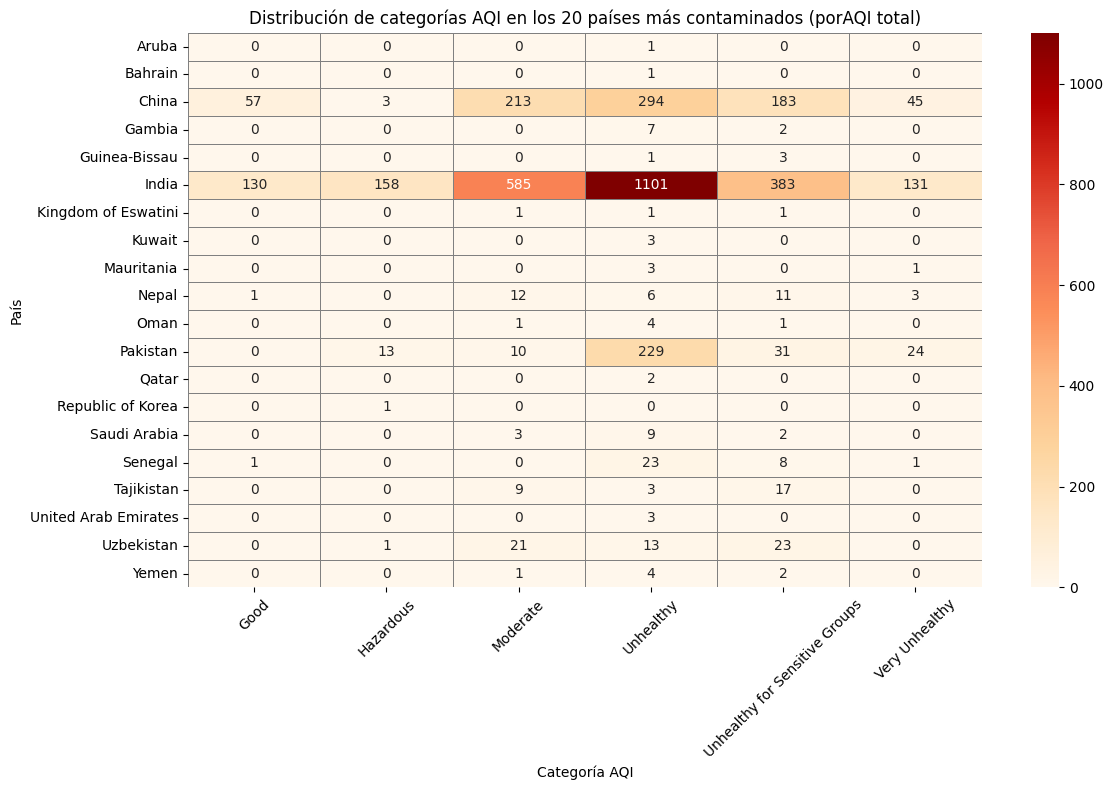

In [93]:
# Paso 1: Calcular el promedio de AQI por país
aqi_avg_by_country = main_df.groupby('country_name')['aqi_value'].mean()

# Paso 2: Seleccionar los 20 países con peor contaminación (mayor promedio)
top_20_polluted_countries = aqi_avg_by_country.sort_values(ascending=False).head(20).index.tolist()

# Paso 3: Filtrar el dataframe a solo esos países
df_top20 = main_df[main_df['country_name'].isin(top_20_polluted_countries)]

# Paso 4: Crear tabla cruzada entre país y categoría AQI
crosstab_top20 = pd.crosstab(df_top20['country_name'], df_top20['aqi_category'])

# Paso 5: Visualizar con heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_top20, annot=True, cmap='OrRd', fmt='d', linewidths=0.5, linecolor='gray')
plt.title("Distribución de categorías AQI en los 20 países más contaminados (porAQI total)")
plt.xlabel("Categoría AQI")
plt.ylabel("País")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [94]:
# Paso 1: Agrupar datos
country_aqi = main_df.groupby('country_name')['aqi_value'].mean().reset_index()

# Paso 2: Crear choropleth compacto
fig = px.choropleth(
    country_aqi,
    locations="country_name",
    locationmode="country names",
    color="aqi_value",
    hover_name="country_name",
    color_continuous_scale="OrRd",
)

# Paso 3: Ajustar layout para hacerlo más compacto
fig.update_layout(
    title_text="Promedio de AQI por país",
    title_x=0.5,
    margin=dict(l=0, r=0, t=30, b=0),  # márgenes mínimos
    height=400,                        # altura reducida
    geo=dict(
        projection_type="natural earth",
        showframe=False,
        showcoastlines=False,
        bgcolor='rgba(0,0,0,0)'
    )
)

# Mostrar figura
fig.show()

In [98]:
# Analisis de México
country = main_df[main_df['country_name']=='Mexico']
country.describe()

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,89.616695,1.751278,16.805792,4.935264,89.371380
std,58.154507,1.239073,9.660434,5.051533,58.451302
min,14.000000,0.000000,0.000000,0.000000,3.000000
25%,51.500000,1.000000,8.000000,1.000000,51.500000
50%,68.000000,1.000000,16.000000,3.000000,68.000000
75%,109.000000,2.000000,25.000000,7.000000,109.000000
max,384.000000,11.000000,41.000000,26.000000,384.000000


/tmp/ipython-input-148404752.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




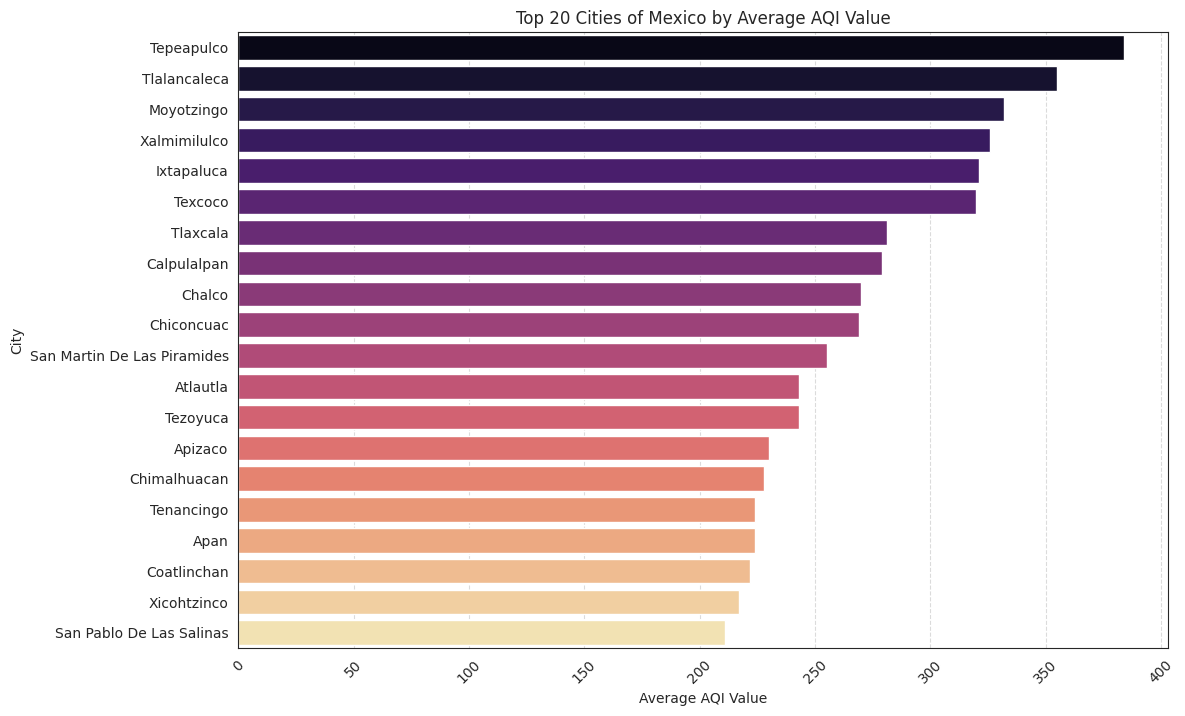

In [100]:
# Average AQI por pais
avg_aqi_by_cityMexico = country.groupby('city_name')['aqi_value'].mean().sort_values(ascending=False)

# Seleccionar top 20 países
top_20_cities = avg_aqi_by_cityMexico.head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index, palette='magma')
plt.title('Top 20 Cities of Mexico by Average AQI Value')
plt.xlabel('Average AQI Value')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#**Manejo de valores atípicos**

Las variables numéricas del dataset presentan distribuciones asimétricas con colas largas, como se evidenció en el análisis de skew, kurtosis y boxplots. Si bien estos outliers reflejan condiciones reales de contaminación extrema en ciertas ciudades o regiones, también pueden afectar negativamente la precisión de algunos modelos sensibles (ej. regresión lineal, SVM).

En este caso, los valores atípicos podrían representar eventos o actividades humanas que llevaron a mala calidad de aire y son considerados importantes.

* No se eliminaron directamente los outliers para preservar la integridad de fenómenos extremos reales (como alertas ambientales).
* En lugar de eliminarlos, se optará por usar modelos robustos como Random Forest, XGBoost y redes neuronales, que toleran mejor distribuciones sesgadas.
* Adicionalmente, se consideran transformaciones logarítmicas para normalizar la escala sin truncar información valiosa.


#**Manejo de alta cardinalidad (variables categóricas)**

* country_name contiene un número manejable de categorías (~50–100 países).
* city_name sí tiene alta cardinalidad (más de 500), lo cual podría impactar negativamente si se codifica como one-hot.

Ya que la aplicación de Aire busca encontrar ciudades y no países que destacan en calidad de aire, mantenemos la columna y no podemos eliminarla.

Para modelado, se utilizará target encoding o frequency encoding si es necesario incluir city_name, reduciendo dimensionalidad sin perder variabilidad semántica.


In [101]:
# Ejemplo de frequency encoding
# Calcular frecuencia relativa por ciudad
city_freq = main_df['city_name'].value_counts(normalize=True)

# Mapear al dataframe
main_df['city_freq_encoded'] = main_df['city_name'].map(city_freq)

In [105]:
main_df[['city_name','city_freq_encoded']].head(10)

,city_name,city_freq_encoded
0,Praskoveya,0.000043
1,Presidente Dutra,0.000043
2,Priolo Gargallo,0.000043
3,Przasnysz,0.000043
4,Punaauia,0.000043
5,Punta Gorda,0.000043
6,Puttlingen,0.000043
7,Puurs,0.000043
8,Pyatigorsk,0.000043
9,Qalyub,0.000043


In [107]:
#Ejemplo de target encoding
# Calcular promedio de AQI por ciudad
city_target = main_df.groupby('city_name')['aqi_value'].mean()

# Mapear al dataframe
main_df['city_target_encoded'] = main_df['city_name'].map(city_target)

In [108]:
main_df[['city_name','city_target_encoded']].head(10)

,city_name,city_target_encoded
0,Praskoveya,51.0
1,Presidente Dutra,41.0
2,Priolo Gargallo,66.0
3,Przasnysz,34.0
4,Punaauia,22.0
5,Punta Gorda,54.0
6,Puttlingen,62.0
7,Puurs,64.0
8,Pyatigorsk,54.0
9,Qalyub,142.0




> Podríamos usar frequency enconding cuando no nos importe mucho la semántica y target enconding cuando tenemos relación fuerte con el target.


